In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
# Generate non-linearly separable dataset
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

In [4]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
# Define kernels to test
kernels = ['linear', 'poly', 'rbf']
results = {}

In [6]:
# Train and evaluate each kernel
for kernel in kernels:
    model = SVC(kernel=kernel, degree=3, C=1.0, gamma='scale')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[kernel] = acc

In [7]:
print("Accuracy comparison with different kernels:")
for k, v in results.items():
    print(f"{k} kernel: {v:.4f}")

Accuracy comparison with different kernels:
linear kernel: 0.8667
poly kernel: 0.9067
rbf kernel: 0.9800


In [8]:
# -------- Optional: Plot Decision Boundaries --------
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.show()

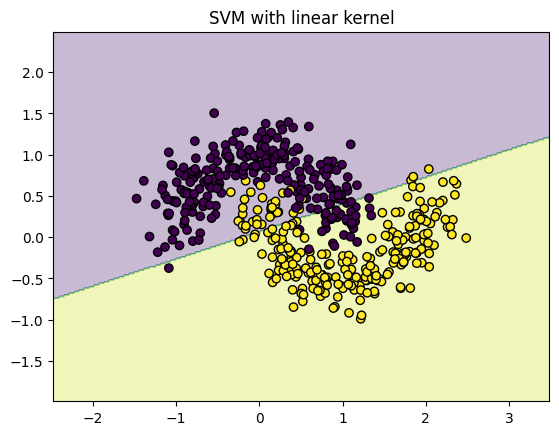

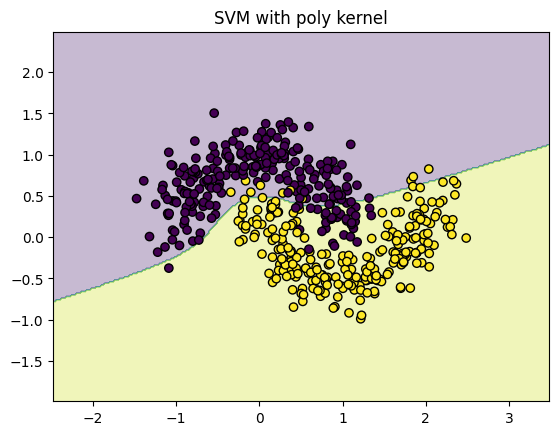

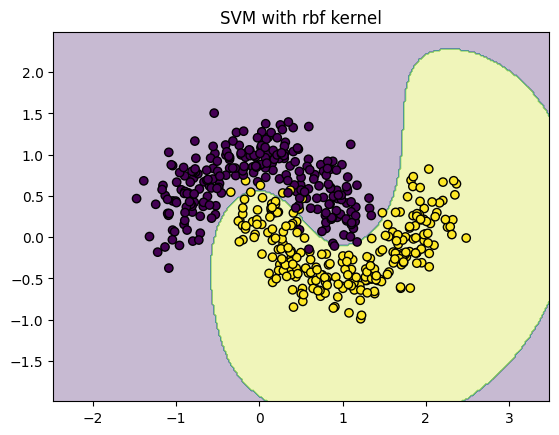

In [9]:
# Plot for each kernel
for kernel in kernels:
    model = SVC(kernel=kernel, degree=3, C=1.0, gamma='scale')
    model.fit(X_train, y_train)
    plot_decision_boundary(model, X, y, f"SVM with {kernel} kernel")